<a href="https://colab.research.google.com/github/thethanh02/sentimentAnalysis/blob/main/Text_Classificatiom_ggcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/thethanh02/sentimentAnalysis/main/text%20classification/datasets/test.csv
!wget https://raw.githubusercontent.com/thethanh02/sentimentAnalysis/main/text%20classification/datasets/train.csv
!wget https://raw.githubusercontent.com/thethanh02/sentimentAnalysis/main/text%20classification/datasets/val.csv

--2023-04-25 08:01:01--  https://raw.githubusercontent.com/thethanh02/sentimentAnalysis/main/text%20classification/datasets/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206773 (202K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 201.93K  --.-KB/s    in 0.02s   

2023-04-25 08:01:01 (8.02 MB/s) - ‘test.csv’ saved [206773/206773]

--2023-04-25 08:01:02--  https://raw.githubusercontent.com/thethanh02/sentimentAnalysis/main/text%20classification/datasets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting r

In [2]:
# download ktrain
!pip install ktrain

#import ktrain and the ktrain.text modules
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 59.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [3]:
# read the dataset
import pandas as pd
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
valid_dataset = pd.read_csv("val.csv")

list_dataset = [train_dataset, test_dataset, valid_dataset]

dataset = pd.concat(list_dataset)

Xfeatures = dataset['Text']
ylabels = dataset['Emotion']

#  Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.1, random_state=41)

# convert pandas series to list
x_train = x_train.tolist()
x_test = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [4]:
# Create a Transformer instance
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 256 # maximum sequence length. The longest sequence in our training set is 47.
class_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
t = text.Transformer(MODEL_NAME, MAX_LEN, class_names=class_names)

In [5]:
# Preprocess the Datasets
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 52


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 53


In [6]:
# Create a Model and Wrap in Learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1500/1500 [==============================] - 496s 319ms/step - loss: 1.2107 - accuracy: 0.5249
Epoch 2/2
1500/1500 [==============================] - 449s 297ms/step - loss: 17614.0254 - accuracy: 0.3164


done.
Visually inspect loss plot and select learning rate associated with falling loss


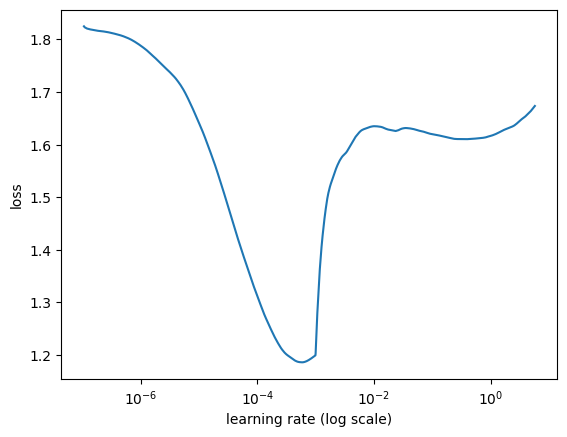

In [7]:
# Estimate a Good Learning Rate
learner.lr_find(show_plot=True, max_epochs=2)

In [8]:
# Train Model
learner.fit_onecycle(5e-5, 6)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/6
1500/1500 [==============================] - 504s 327ms/step - loss: 0.4537 - accuracy: 0.8478 - val_loss: 0.2028 - val_accuracy: 0.9250
Epoch 2/6
1500/1500 [==============================] - 490s 327ms/step - loss: 0.1529 - accuracy: 0.9368 - val_loss: 0.1994 - val_accuracy: 0.9160
Epoch 3/6
1500/1500 [==============================] - 491s 327ms/step - loss: 0.1350 - accuracy: 0.9406 - val_loss: 0.1921 - val_accuracy: 0.9195
Epoch 4/6
1500/1500 [==============================] - 486s 324ms/step - loss: 0.1079 - accuracy: 0.9472 - val_loss: 0.1487 - val_accuracy: 0.9310
Epoch 5/6
1500/1500 [==============================] - 486s 324ms/step - loss: 0.0809 - accuracy: 0.9606 - val_loss: 0.1507 - val_accuracy: 0.9300
Epoch 6/6
1500/1500 [==============================] - 486s 324ms/step - loss: 0.0526 - accuracy: 0.9753 - val_loss: 0.1759 - val_accuracy: 0.9370


In [9]:
# Evaluate/Inspect Model
learner.validate(class_names = class_names)

63/63 [==============================] - 9s 92ms/step
              precision    recall  f1-score   support

       anger       0.93      0.96      0.94       298
        fear       0.92      0.89      0.91       225
         joy       0.95      0.95      0.95       666
        love       0.83      0.84      0.84       161
     sadness       0.97      0.97      0.97       581
    surprise       0.85      0.77      0.81        69

    accuracy                           0.94      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.94      0.94      0.94      2000



array([[285,   4,   0,   0,   9,   0],
       [  7, 201,   0,   0,   9,   8],
       [  3,   1, 634,  26,   2,   0],
       [  2,   0,  24, 135,   0,   0],
       [  9,   2,   2,   1, 566,   1],
       [  0,  11,   5,   0,   0,  53]])

In [10]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

63/63 [==============================] - 5s 82ms/step
----------
id:167 | loss:9.85 | true:love | pred:anger)



In [11]:
# Make Predictions on New Data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict("I can't imagine how hard it must be for you.")

'joy'

# Save Model

In [12]:
# save Predictor (i.e., model and Preprocessor instance) after partially training
predictor.save("/saved_model")

In [18]:
# !zip /saved_model.zip /saved_model

# Load Model

In [13]:
# reload Predictor and extract model
#model = ktrain.load_predictor('/content/saved_model')